<a href="https://colab.research.google.com/github/aryan-at-ul/graph_from_patches/blob/main/image_as_graph_chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-igraph

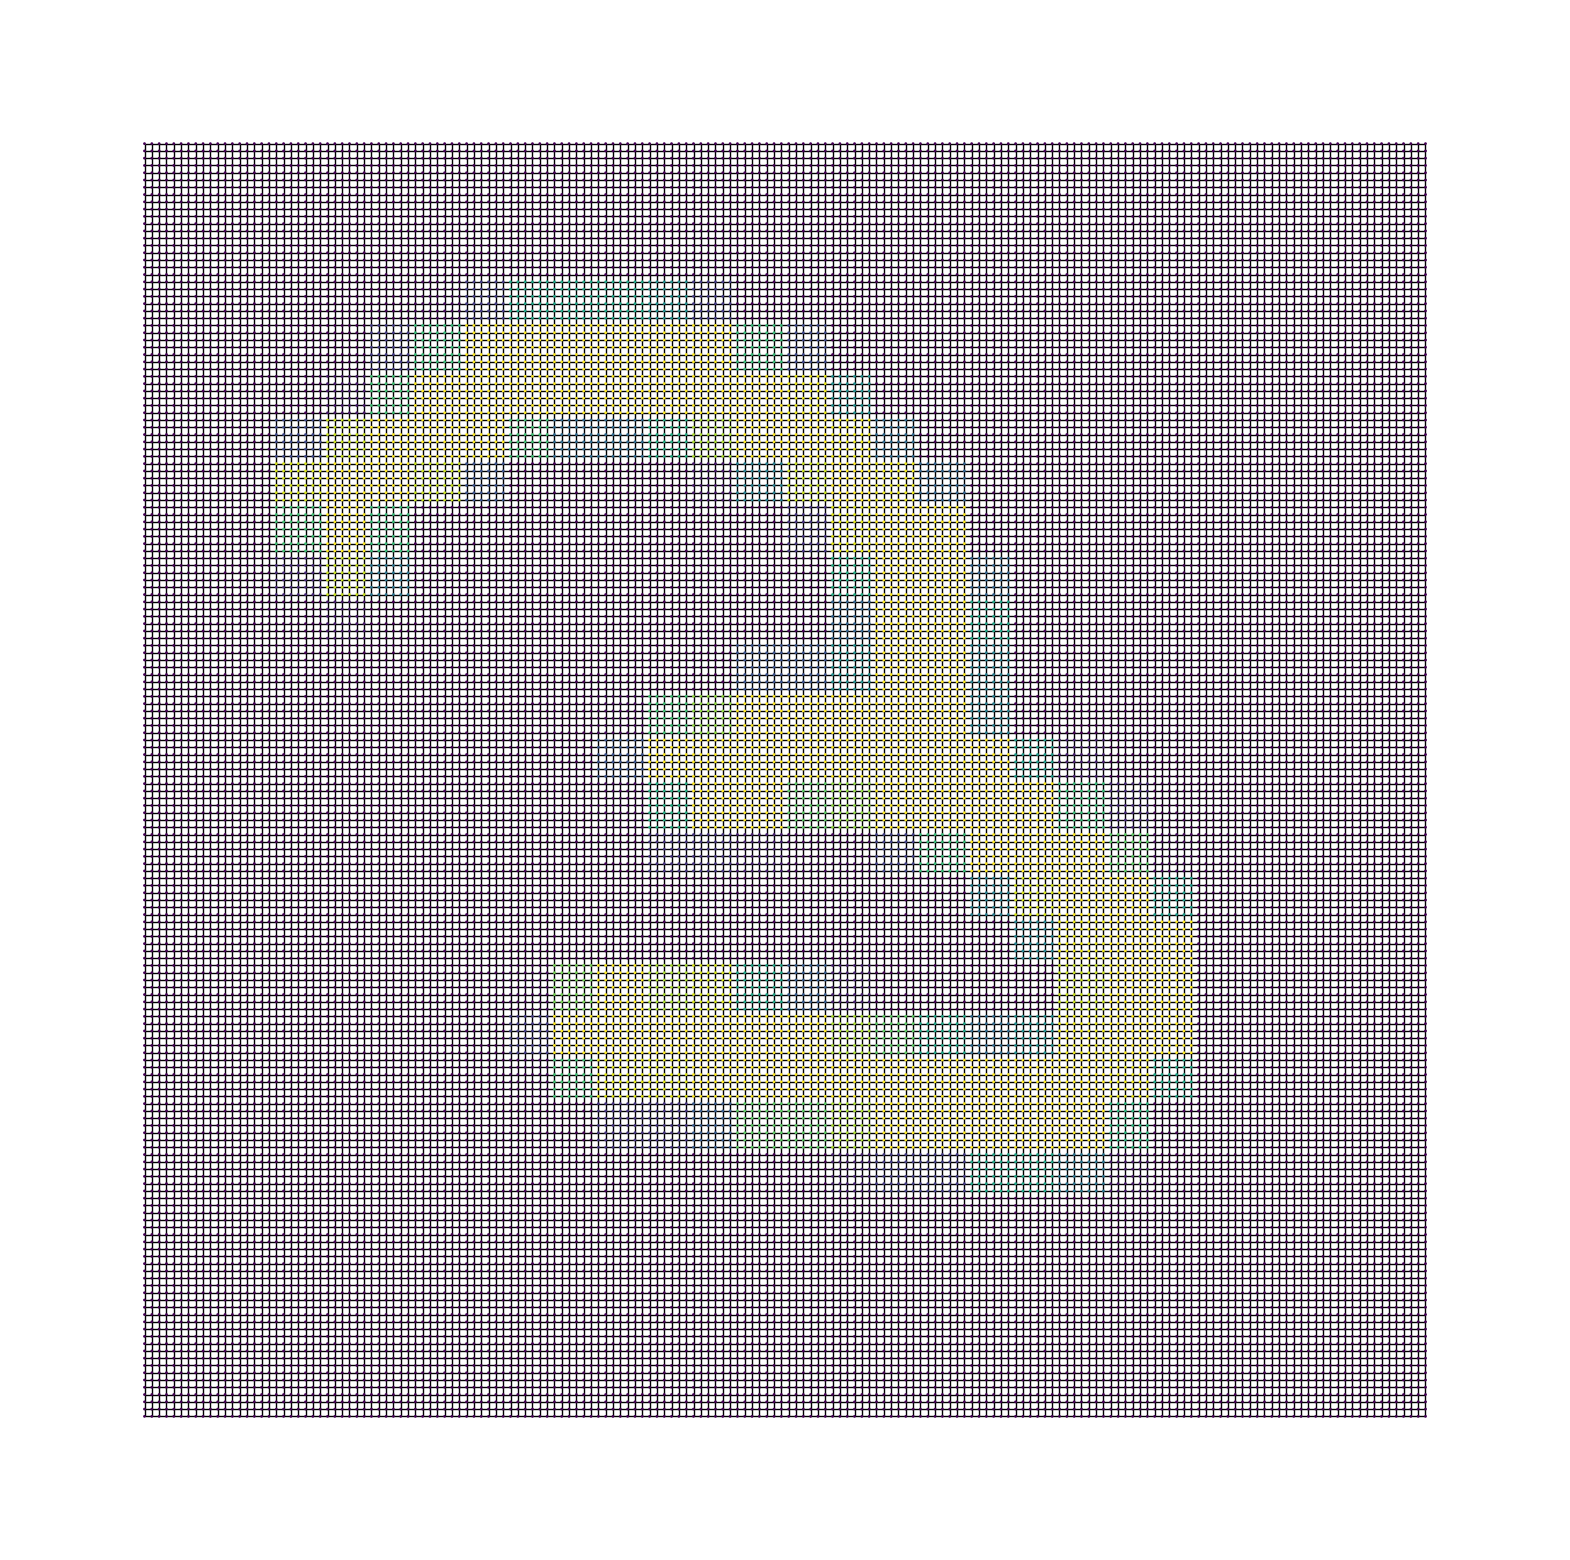

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image

def image_to_graph(image_path):
    # Load the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    width, height = image.size

    # Create a new graph
    graph = nx.Graph()

    # Add nodes with grayscale values as node features
    for y in range(height):
        for x in range(width):
            pixel_value = image.getpixel((x, y))
            graph.add_node((x, y), grayscale=pixel_value)

    # Add edges between adjacent pixels
    for y in range(height):
        for x in range(width):
            current_node = (x, y)

            # Check adjacent pixels
            neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
            for neighbor in neighbors:
                if 0 <= neighbor[0] < width and 0 <= neighbor[1] < height:
                    graph.add_edge(current_node, neighbor)

    return graph

# Example usage
image_path = '/content/mnistsample.png'
graph = image_to_graph(image_path)

# Visualize the graph
pos = {node: node for node in graph.nodes()}  # Position each node at its (x, y) coordinates
labels = {node: data['grayscale'] for node, data in graph.nodes(data=True)}  # Use grayscale values as labels
node_colors = [data['grayscale'] / 255 for _, data in graph.nodes(data=True)]  # Scale grayscale values to [0, 1]
edge_colors = 'gray'

plt.figure(figsize=(20, 20))
# nx.draw_networkx(graph, pos, with_labels=False, node_size=1, node_color=node_colors, edge_color=edge_colors)
nx.draw_networkx(graph, pos, with_labels=False, node_size=1, node_color=node_colors,edge_color="black")

plt.axis('off')
plt.show()


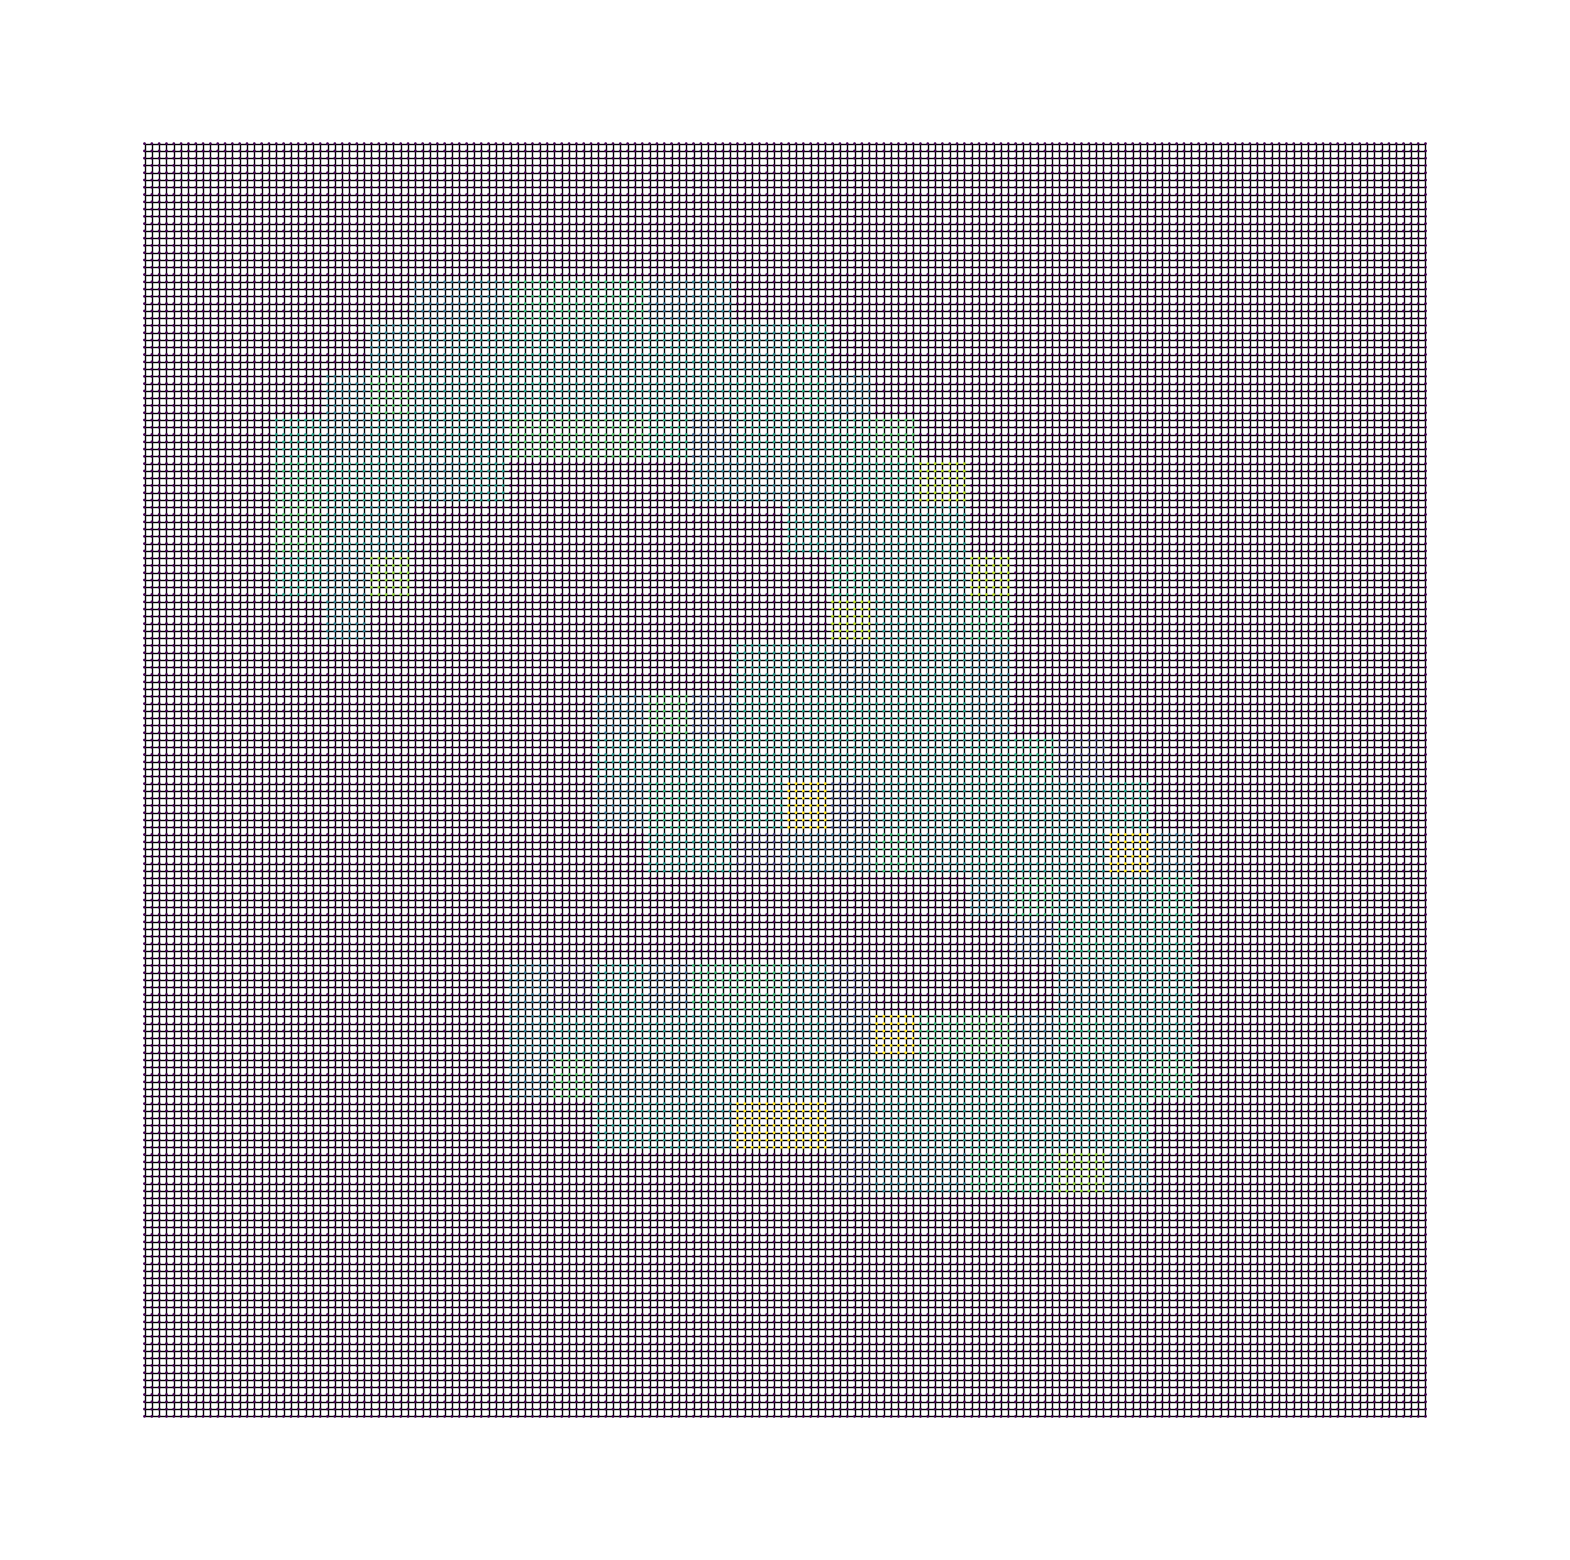

In [3]:
def image_to_graph_rgb(image_path):
    # Load the image
    image = Image.open(image_path).convert('RGB')  # Convert to RGB
    width, height = image.size

    # Create a new graph
    graph = nx.Graph()

    # Add nodes with RGB values as node features
    for y in range(height):
        for x in range(width):
            pixel_value = image.getpixel((x, y))
            rgb_str = ','.join(map(str, pixel_value))  # Convert the RGB tuple to a string
            graph.add_node((x, y), RGB=rgb_str)

    # Add edges between adjacent pixels
    for y in range(height):
        for x in range(width):
            current_node = (x, y)

            # Check adjacent pixels
            neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
            for neighbor in neighbors:
                if 0 <= neighbor[0] < width and 0 <= neighbor[1] < height:
                    graph.add_edge(current_node, neighbor)

    return graph


image_path = '/content/mnistsample.png'
graph = image_to_graph_rgb(image_path)

# Visualize the graph
pos = {node: node for node in graph.nodes()}  # Position each node at its (x, y) coordinates
labels = {node: data['RGB'] for node, data in graph.nodes(data=True)}  # Use grayscale values as labels
node_colors = [sum(int(x) for x in data['RGB'].split(',')[2]) / 255 * 3 for _, data in graph.nodes(data=True)]  # Scale grayscale values to [0, 1]
edge_colors = 'gray'

plt.figure(figsize=(20, 20))
# nx.draw_networkx(graph, pos, with_labels=False, node_size=1, node_color=node_colors, edge_color=edge_colors)
nx.draw_networkx(graph, pos, with_labels=False, node_size=1, node_color=node_colors,edge_color="black")

plt.axis('off')
plt.show()


In [ ]:
 def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spectral_layout(graph)
    # pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    # pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(graph,"my_graph.pdf")

In [4]:
print("NetworkX graph information:")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

# nx.draw(graph)

NetworkX graph information:
Number of nodes: 30976
Number of edges: 61600


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def knn_on_graph(graph, k):
    # First, extract node features (RGB values) and build a node-index mapping
    features = []
    node_to_idx = {}
    idx_to_node = {}
    
    for i, (node, data) in enumerate(graph.nodes(data=True)):
        rgb_str = data['RGB']
        features.append([int(val) for val in rgb_str.split(',')])
        node_to_idx[node] = i
        idx_to_node[i] = node

    features = np.array(features)

    # Check what ball tree algo is ?????????????
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(features)
    distances, indices = nbrs.kneighbors(features)

    # Now, prune the graph to only include edges between k-nearest neighbors
    new_graph = nx.Graph()
    for i in range(len(features)):
        for j in range(1, k+1):  # Skip the first index, as it's the node itself
            neighbor_idx = indices[i][j]
            new_graph.add_edge(idx_to_node[i], idx_to_node[neighbor_idx])

    return new_graph

# This code has issues when pos and node attr missing this fx takes too long????????
new_graph = knn_on_graph(graph, k=5)
plt.figure(figsize=(20, 20))
nx.draw_networkx(new_graph)
plt.axis('off')
plt.show()

In [5]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def knn_on_graph(graph, k):
    # First, extract node features (RGB values) and build a node-index mapping
    features = []
    node_to_idx = {}
    idx_to_node = {}
    pos = {}  # Position each node at its (x, y) coordinates
    labels = {}  # Use RGB values as labels
    node_colors = []  # Scale the blue color channel to [0, 1]
    
    for i, (node, data) in enumerate(graph.nodes(data=True)):
        rgb_str = data['RGB']
        features.append([int(val) for val in rgb_str.split(',')])
        node_to_idx[node] = i
        idx_to_node[i] = node

        pos[node] = node
        labels[node] = rgb_str
        node_colors.append(int(rgb_str.split(',')[2]) / 255)

    features = np.array(features)

    # try other algos too ????
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(features)
    distances, indices = nbrs.kneighbors(features)

    # Now, prune the graph to only include edges between k-nearest neighbors
    new_graph = nx.Graph()
    for i in range(len(features)):
        for j in range(1, k+1):  # Skip the first index, as it's the node itself
            neighbor_idx = indices[i][j]
            new_graph.add_edge(idx_to_node[i], idx_to_node[neighbor_idx])
   
    nx.set_node_attributes(new_graph, pos, 'pos')
    nx.set_node_attributes(new_graph, labels, 'label')
    nx.set_node_attributes(new_graph, node_colors, 'node_color')
    nx.set_edge_attributes(new_graph, 'gray', 'edge_color')
    
    return new_graph

new_graph = knn_on_graph(graph, k=5)

print("NetworkX graph information:")
print(f"Number of nodes: {new_graph.number_of_nodes()}")
print(f"Number of edges: {new_graph.number_of_edges()}")

# plt.figure(figsize=(20, 20))
# # nx.draw_networkx(graph, pos, with_labels=False, node_size=1, node_color=node_colors, edge_color=edge_colors)
# nx.draw_networkx(new_graph)
# plt.axis('off')
# plt.show()

NetworkX graph information:
Number of nodes: 30976
Number of edges: 154550


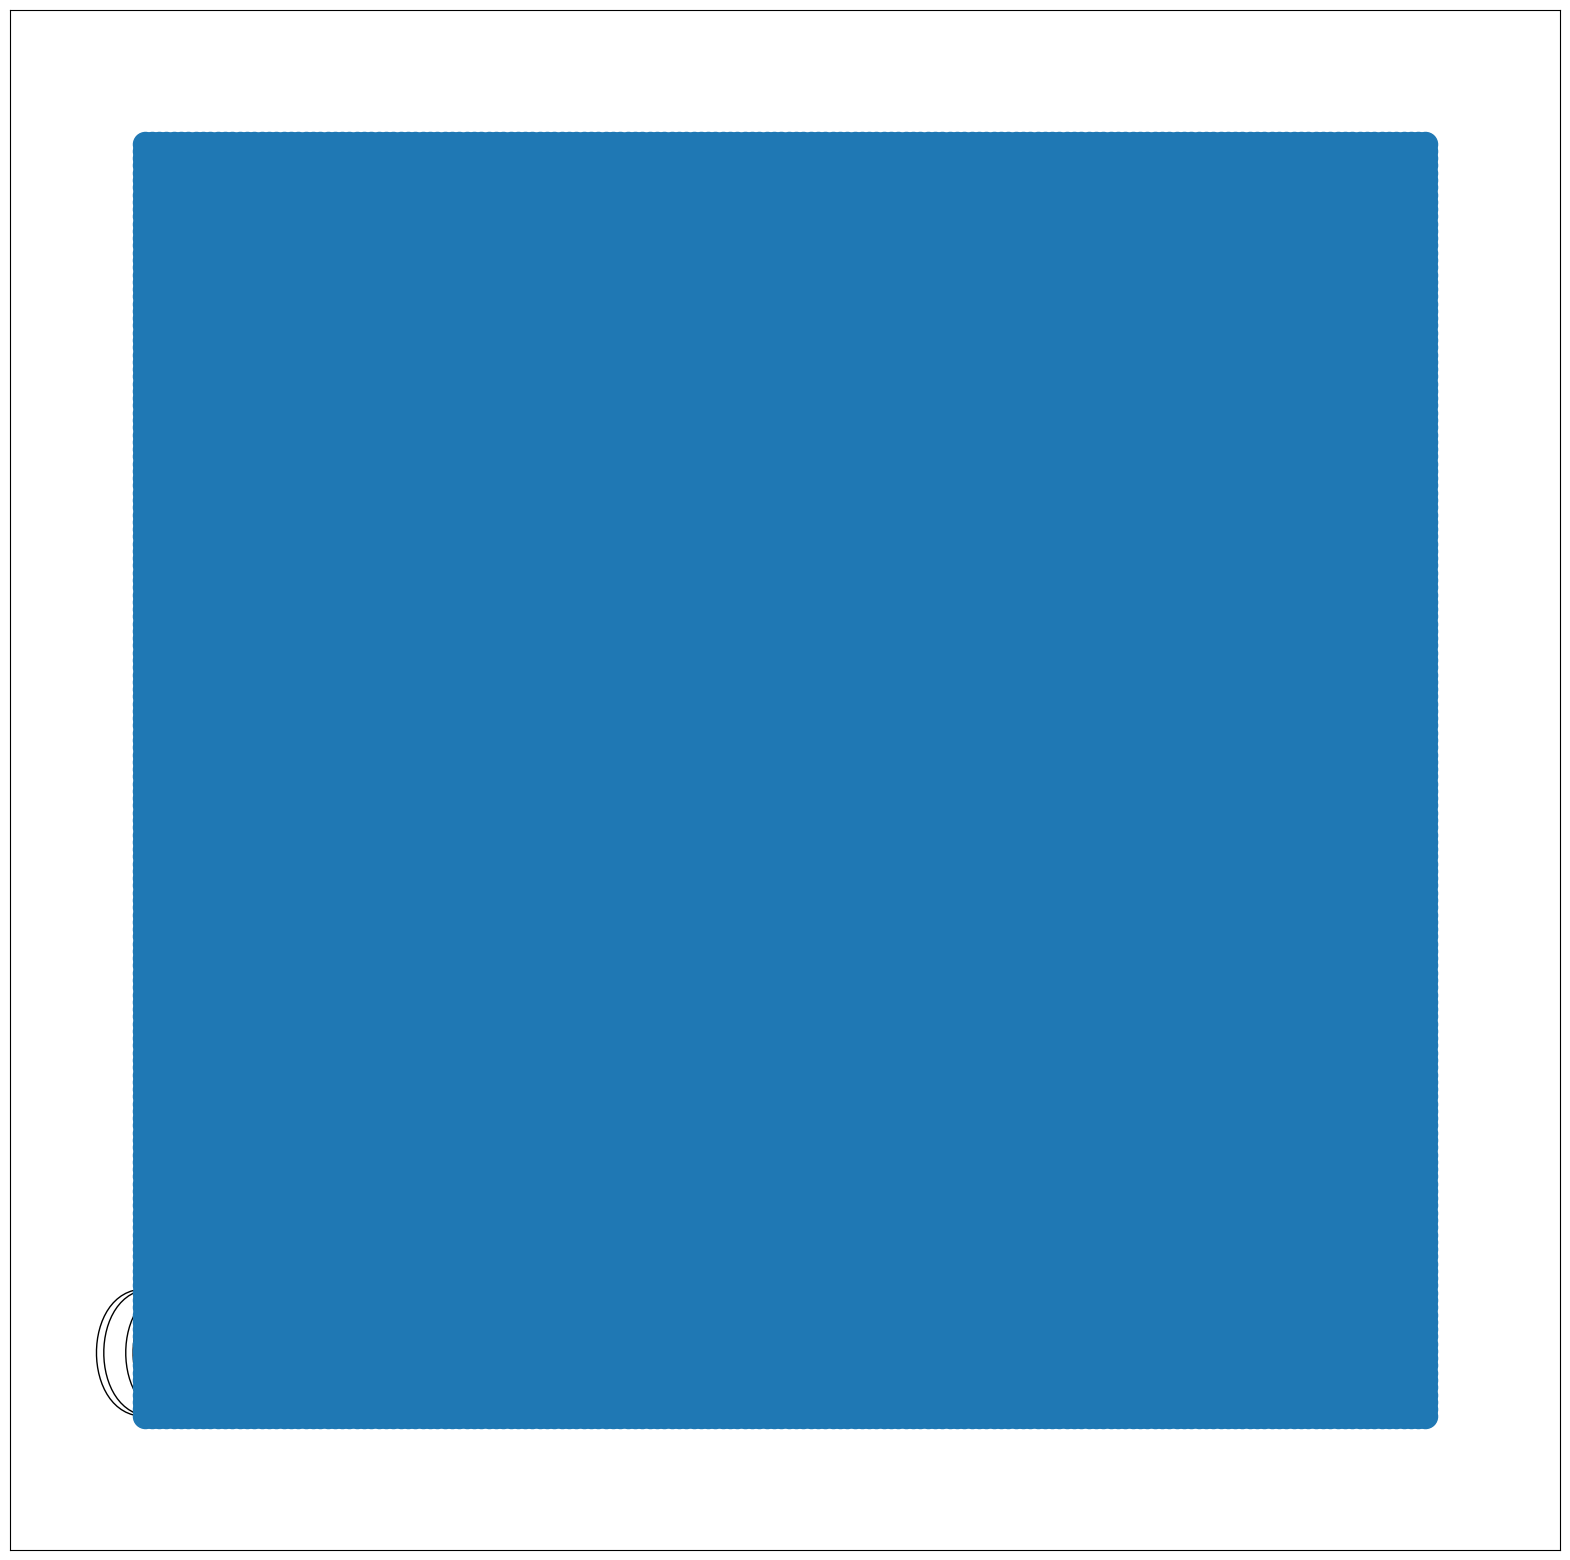

In [7]:
import matplotlib.pyplot as plt

def draw_graph(graph):
    pos = nx.get_node_attributes(graph, 'pos')
    # node_colors = [data['node_color'] for _, data in graph.nodes(data=True)]
    
    # put default values here
    # edge_colors = [graph[u][v].get('edge_color', 'k') for u, v in graph.edges()]
    plt.figure(figsize=(20, 20))
    nx.draw_networkx(graph, pos=pos,with_labels=False)
    plt.show()


draw_graph(new_graph)




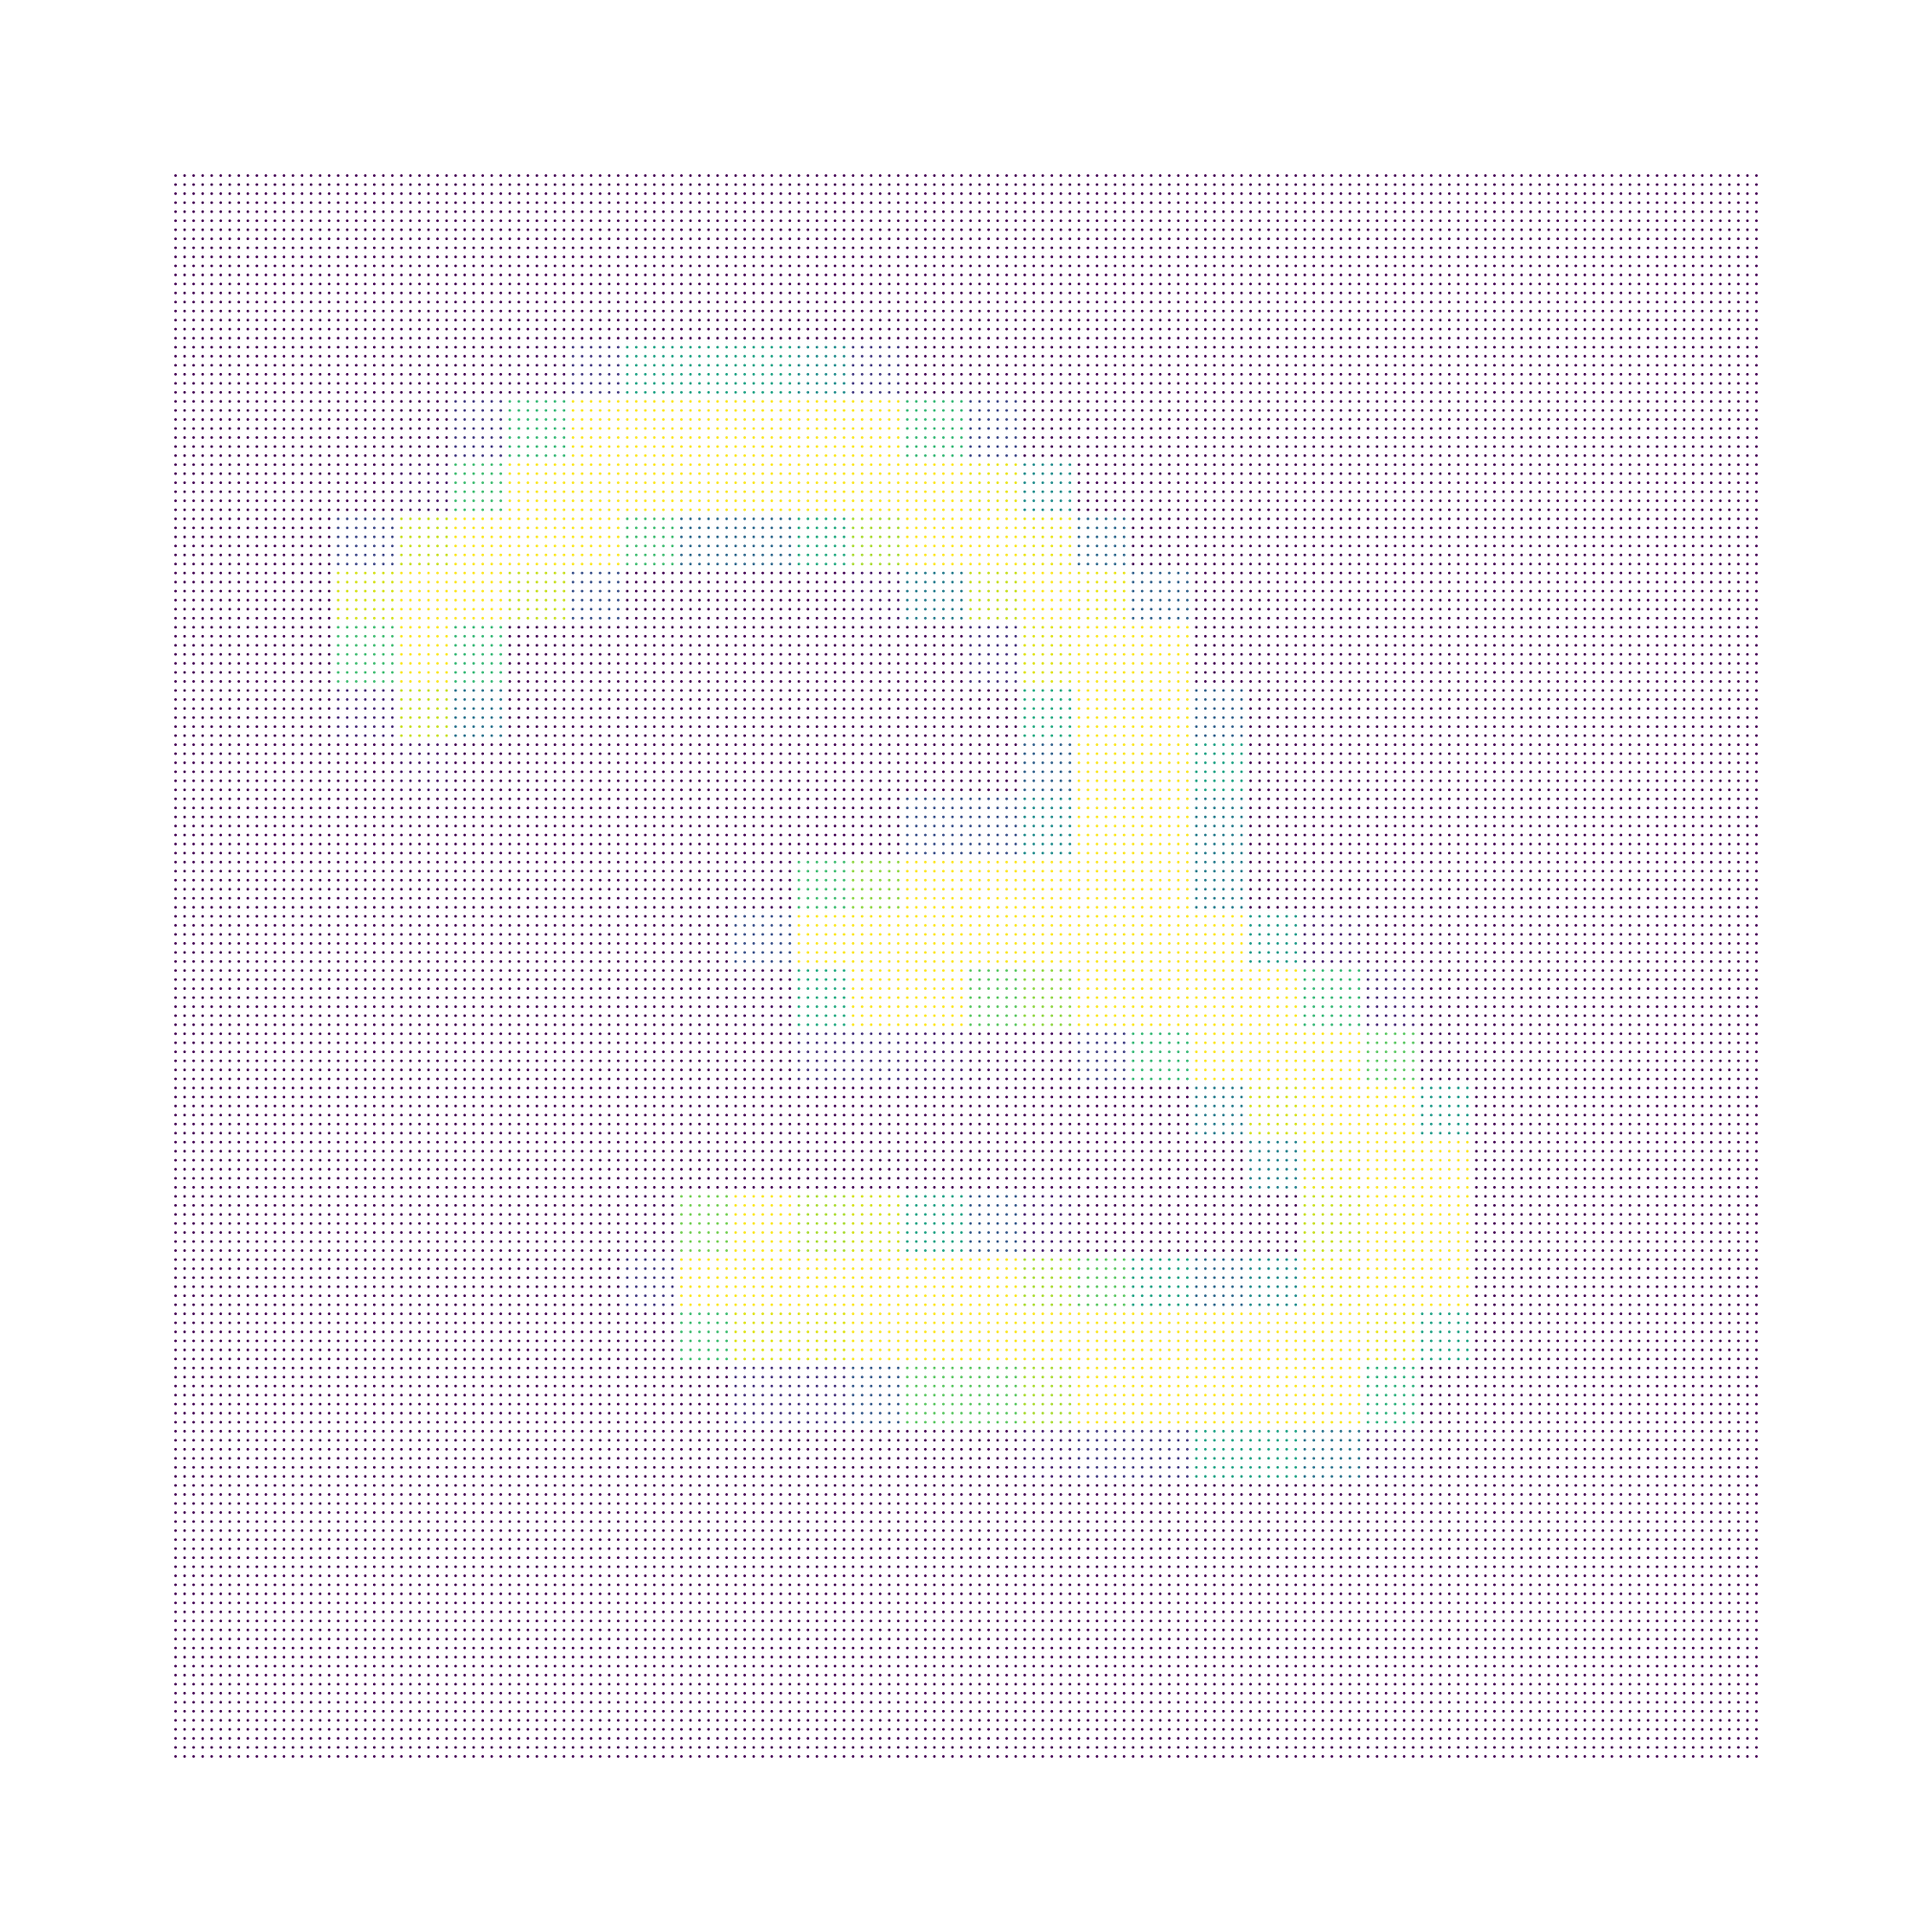

In [12]:
def knn_on_graph(graph, k):
    # First, extract node features (RGB values) and build a node-index mapping
    features = []
    node_to_idx = {}
    idx_to_node = {}
    pos = {}  # Position each node at its (x, y) coordinates
    labels = {}  # Use RGB values as labels
    node_colors = {}  # Average RGB values
    
    for i, (node, data) in enumerate(graph.nodes(data=True)):
        rgb_str = data['RGB']
        rgb_values = [int(val) for val in rgb_str.split(',')]
        features.append(rgb_values)
        node_to_idx[node] = i
        idx_to_node[i] = node

        pos[node] = (node[0], node[1])  # assuming node is a tuple (x, y)
        labels[node] = rgb_str
        node_colors[node] = sum(rgb_values) / (3 * 255)  # Average of RGB values and normalize

    features = np.array(features)

    # Use sklearn's NearestNeighbors to find k nearest neighbors for each node
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(features)
    distances, indices = nbrs.kneighbors(features)

    # Now, prune the graph to only include edges between k-nearest neighbors
    new_graph = nx.Graph()
    for i in range(len(features)):
        for j in range(1, k+1):  # Skip the first index, as it's the node itself
            neighbor_idx = indices[i][j]
            new_graph.add_edge(idx_to_node[i], idx_to_node[neighbor_idx])
    
    # Add node and edge attributes
    nx.set_node_attributes(new_graph, pos, 'pos')
    nx.set_node_attributes(new_graph, labels, 'label')
    nx.set_node_attributes(new_graph, node_colors, 'node_color')
    nx.set_edge_attributes(new_graph, 'gray', 'edge_color')
    
    return new_graph

new_graph = knn_on_graph(graph, k=2)


pos = nx.get_node_attributes(new_graph, 'pos')
node_colors = [data for data in nx.get_node_attributes(new_graph, 'node_color').values()]
edge_colors = [data.get('edge_color', 'k') for _, _, data in new_graph.edges(data=True)]

plt.figure(figsize=(20, 20))
nx.draw(new_graph, pos=pos, node_color=node_colors, node_size = 1, edge_color='white', with_labels=False)
plt.show()